# Golden Task: Choose a dataset with a time component and perform time series analysis

**Embark on a time series analysis project using a dataset with a time
component, specifically historical stock prices. The objective is to uncover
patterns, trends, and insights from the temporal data, enabling a better
understanding of stock price movements over time.**

## Objective
* Perform a comprehensive time series analysis on a dataset containing historical stock prices 
* for Amazon (AMZN), Domino's Pizza (DPZ), Bitcoin (BTC), and Netflix (NFLX). 
* The goal is to uncover patterns, trends, and insights from the temporal data to better understand 
* stock price movements over time.


## Task List

1. Data Loading and Exploration
2. Data Cleaning
3. Data Visualization
4. Decomposition of Time Series
5. Statistical Analysis
6. Stationarity Testing
7. Autocorrelation and Partial Autocorrelation Analysis
8. Time Series Modeling
9. Forecasting


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('/kaggle/input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv')
data.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [3]:
data.shape

(1520, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [5]:
data.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [6]:
data.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

# 1. Data Loading and Exploration
- Import necessary libraries (e.g., pandas, numpy, matplotlib, seaborn).
- Load the dataset containing columns: 'Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'.
- Convert the 'Date' column to datetime format.
- Set 'Date' as the index of the DataFrame.
- Display the first few rows of the dataset to understand its structure.


In [7]:
# 1. Data Loading and Exploration
# Load the dataset
data_path = "/kaggle/input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv"  # Change this to your dataset path
df = pd.read_csv(data_path)


# Convert 'Date' column to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the first few rows of the dataset
df.head()

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


# 2. Data Cleaning
- Check for and handle any missing values.
- Ensure the data types are appropriate for time series analysis.


In [8]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)

# Handle missing values (if any)
df = df.dropna()

AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


# 3. Data Visualization
- Plot the time series for each stock (AMZN, DPZ, BTC, NFLX) to visualize trends and patterns.
- Use subplots to compare the time series of different stocks.


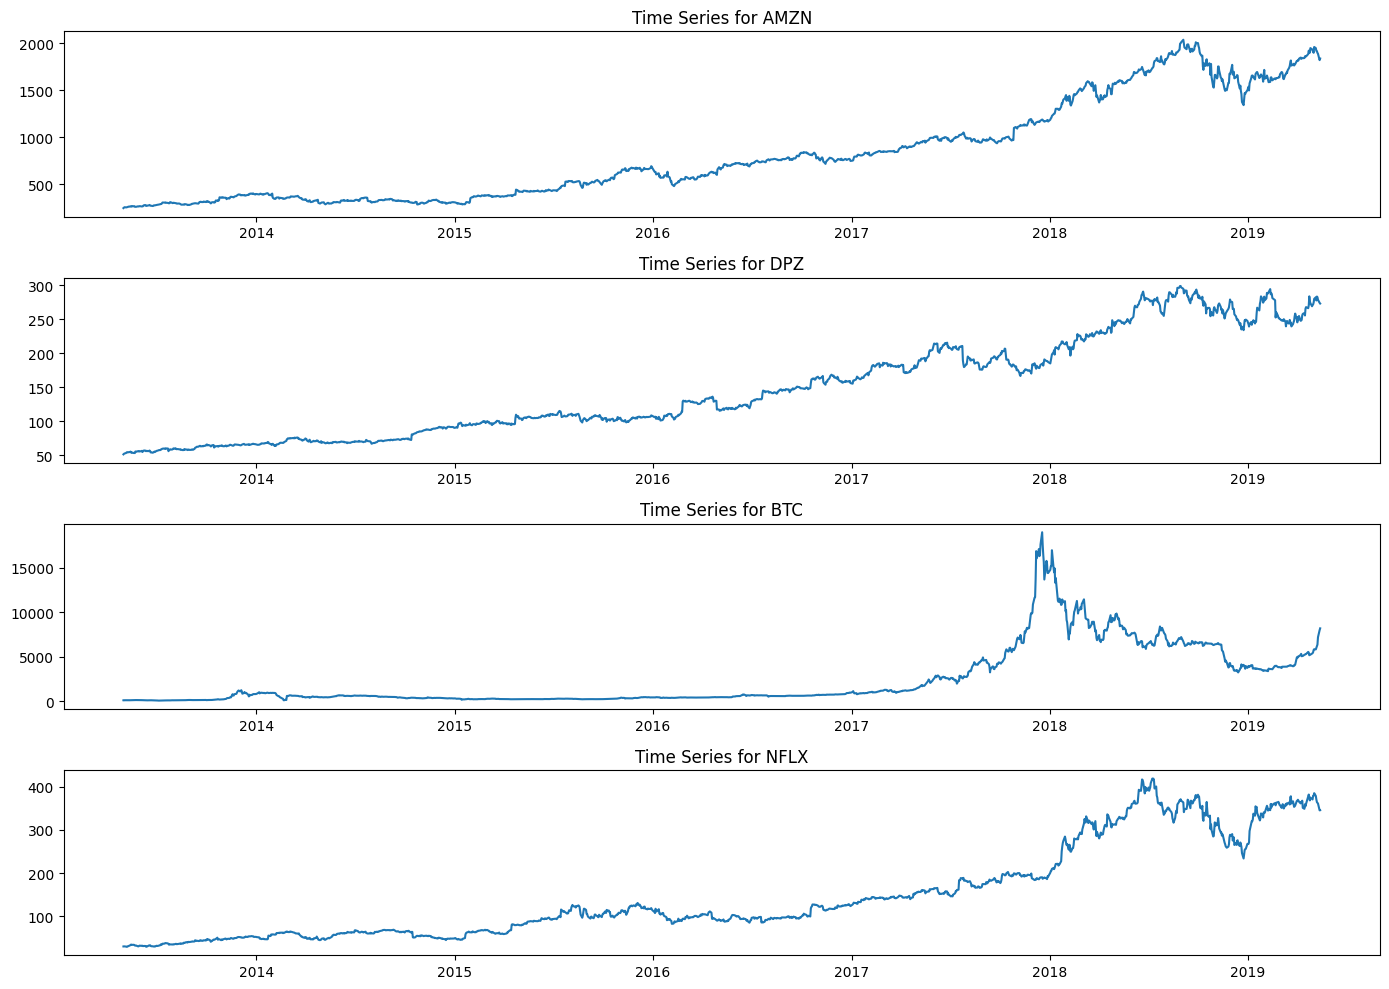

In [9]:
# 3. Data Visualization
# Plot the time series for each stock
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    plt.plot(df[column])
    plt.title(f'Time Series for {column}')
plt.tight_layout()
plt.show()


# 4. Decomposition of Time Series
- Decompose each time series into its components: trend, seasonality, and residuals using seasonal decomposition.


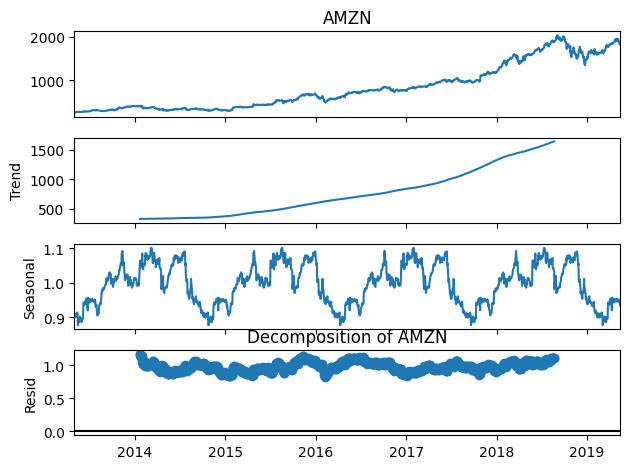

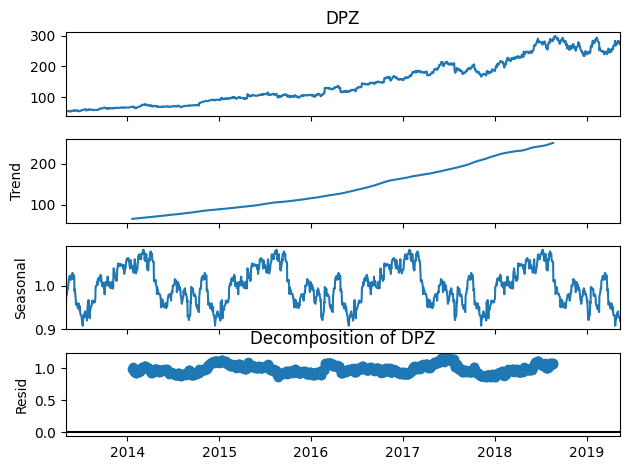

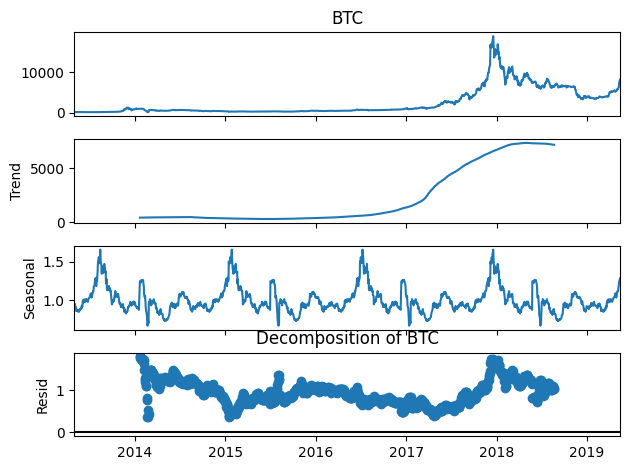

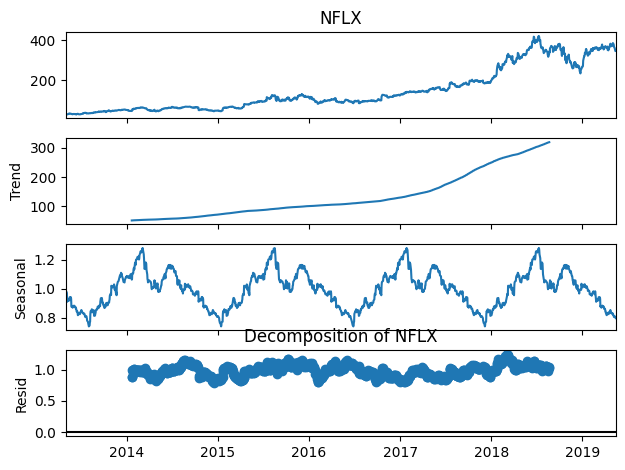

In [10]:
# 4. Decomposition of Time Series
# Decompose each time series
decompositions = {}
for column in df.columns:
    decompositions[column] = seasonal_decompose(df[column], model='multiplicative', period=365)
    decompositions[column].plot()
    plt.title(f'Decomposition of {column}')
    plt.show()


# 5. Statistical Analysis
- Perform summary statistics on each stock's time series data.
- Calculate and plot moving averages to smooth out short-term fluctuations and highlight longer-term trends.


              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001


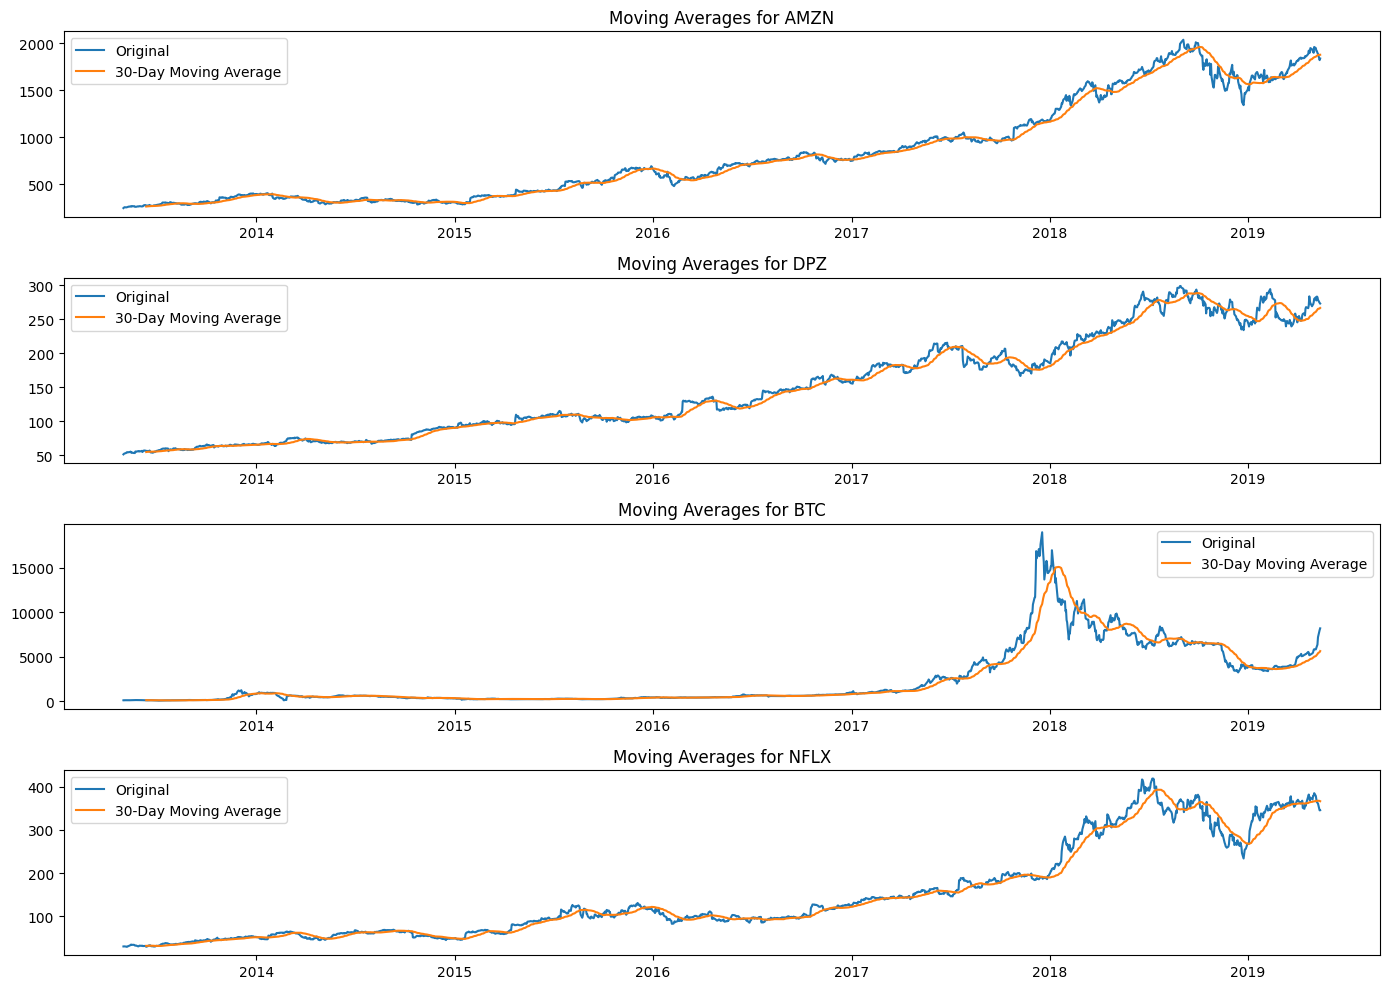

In [11]:
# 5. Statistical Analysis
# Summary statistics
summary_statistics = df.describe()
print(summary_statistics)

# Calculate and plot moving averages
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    plt.plot(df[column], label='Original')
    plt.plot(df[column].rolling(window=30).mean(), label='30-Day Moving Average')
    plt.title(f'Moving Averages for {column}')
    plt.legend()
plt.tight_layout()
plt.show()


# 6. Stationarity Testing
- Conduct stationarity tests (e.g., Augmented Dickey-Fuller test) to check if the time series are stationary.
- If necessary, apply transformations to achieve stationarity (e.g., differencing, log transformation).


In [12]:
# 6. Stationarity Testing
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

# Perform ADF test
for column in df.columns:
    print(f'Stationarity Test for {column}')
    adf_test(df[column])
    print('\n')


Stationarity Test for AMZN
ADF Statistic: 0.55365991233002
p-value: 0.9864159495725892
Critical Value 1%: -3.434731647915545
Critical Value 5%: -2.8634752174058944
Critical Value 10%: -2.5678002869095424


Stationarity Test for DPZ
ADF Statistic: -0.2793349606892411
p-value: 0.9283805552655593
Critical Value 1%: -3.4346765666049732
Critical Value 5%: -2.8634509075517536
Critical Value 10%: -2.5677873417107437


Stationarity Test for BTC
ADF Statistic: -1.3230811198913242
p-value: 0.6185476417504836
Critical Value 1%: -3.4347228578139943
Critical Value 5%: -2.863471337969528
Critical Value 10%: -2.5677982210726897


Stationarity Test for NFLX
ADF Statistic: -0.18415819336089026
p-value: 0.9403837629187614
Critical Value 1%: -3.434725783926551
Critical Value 5%: -2.863472629385615
Critical Value 10%: -2.567798908763865




# 7. Autocorrelation and Partial Autocorrelation Analysis
- Plot autocorrelation (ACF) and partial autocorrelation (PACF) functions to identify significant lags in the data.


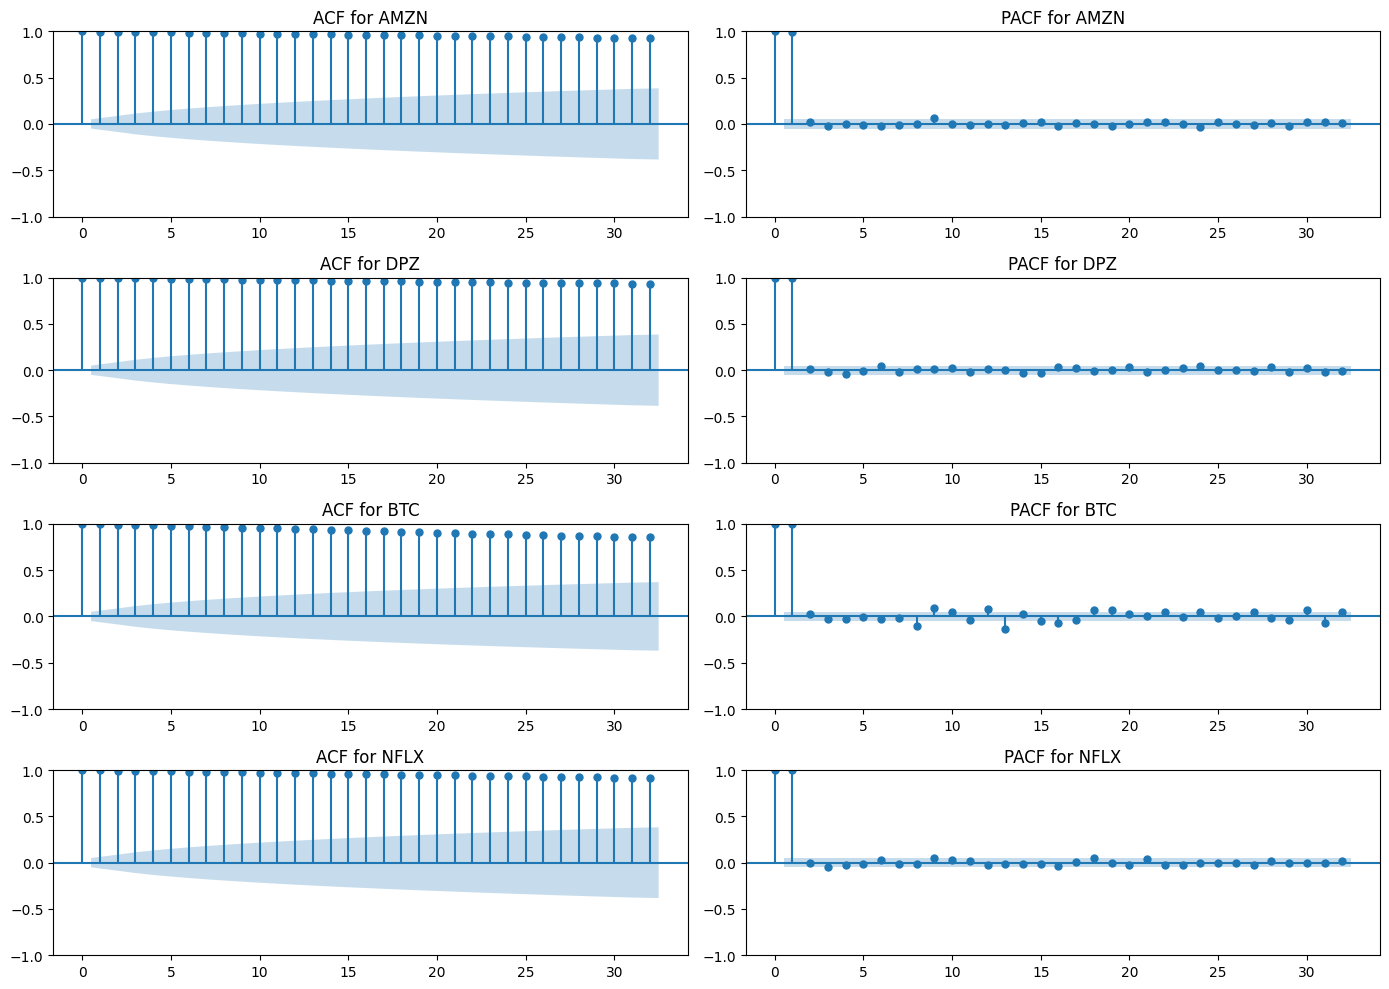

In [13]:
# 7. Autocorrelation and Partial Autocorrelation Analysis
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 2, 2*i-1)
    plot_acf(df[column], ax=plt.gca(), title=f'ACF for {column}')
    plt.subplot(len(df.columns), 2, 2*i)
    plot_pacf(df[column], ax=plt.gca(), title=f'PACF for {column}')
plt.tight_layout()
plt.show()


# 8. Time Series Modeling
- Split the data into training and testing sets.
- Fit ARIMA/SARIMA models to each stock's time series data.
- Evaluate model performance using appropriate metrics (e.g., AIC, BIC, RMSE).


In [14]:
# 8. Time Series Modeling
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model for each stock
models = {}
for column in df.columns:
    model = ARIMA(train[column], order=(5, 1, 0))
    models[column] = model.fit()
    print(f'{column} ARIMA Model Summary')
    print(models[column].summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AMZN ARIMA Model Summary
                               SARIMAX Results                                
Dep. Variable:                   AMZN   No. Observations:                 1216
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4633.295
Date:                Mon, 03 Jun 2024   AIC                           9278.590
Time:                        05:58:59   BIC                           9309.205
Sample:                             0   HQIC                          9290.115
                               - 1216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0315      0.020      1.546      0.122      -0.008       0.071
ar.L2          0.0056      0.018      0.316      0.752      -0.029       0.040
ar.L3         -0.0501      

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


DPZ ARIMA Model Summary
                               SARIMAX Results                                
Dep. Variable:                    DPZ   No. Observations:                 1216
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2587.427
Date:                Mon, 03 Jun 2024   AIC                           5186.854
Time:                        05:59:00   BIC                           5217.469
Sample:                             0   HQIC                          5198.379
                               - 1216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0483      0.018      2.634      0.008       0.012       0.084
ar.L2         -0.0181      0.023     -0.776      0.438      -0.064       0.028
ar.L3          0.0788      0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


BTC ARIMA Model Summary
                               SARIMAX Results                                
Dep. Variable:                    BTC   No. Observations:                 1216
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8401.558
Date:                Mon, 03 Jun 2024   AIC                          16815.117
Time:                        05:59:00   BIC                          16845.732
Sample:                             0   HQIC                         16826.642
                               - 1216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0359      0.007     -5.024      0.000      -0.050      -0.022
ar.L2          0.0699      0.009      8.016      0.000       0.053       0.087
ar.L3          0.1081      0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NFLX ARIMA Model Summary
                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                 1216
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2952.400
Date:                Mon, 03 Jun 2024   AIC                           5916.801
Time:                        05:59:00   BIC                           5947.416
Sample:                             0   HQIC                          5928.326
                               - 1216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0694      0.018      3.778      0.000       0.033       0.105
ar.L2          0.0265      0.020      1.344      0.179      -0.012       0.065
ar.L3          0.0817      

# 9. Forecasting
- Use the fitted models to forecast future stock prices.
- Plot the forecasts against the actual data to visualize accuracy.


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


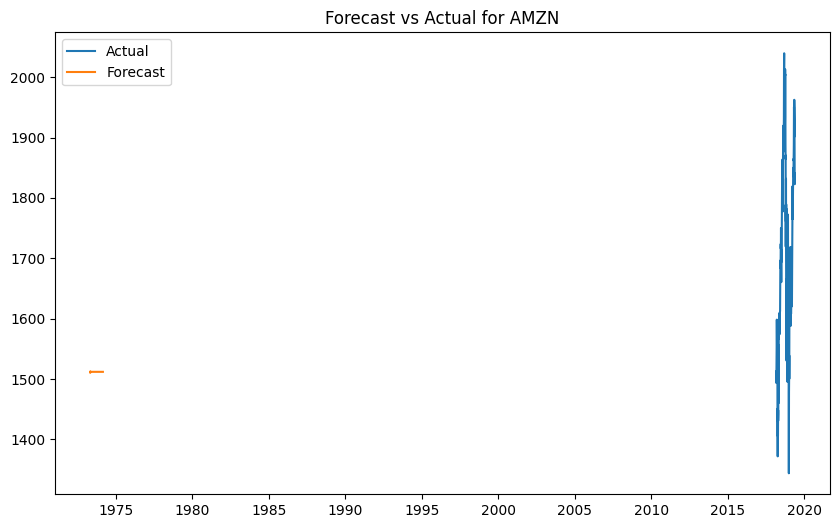

AMZN RMSE: 247.93088974452212


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


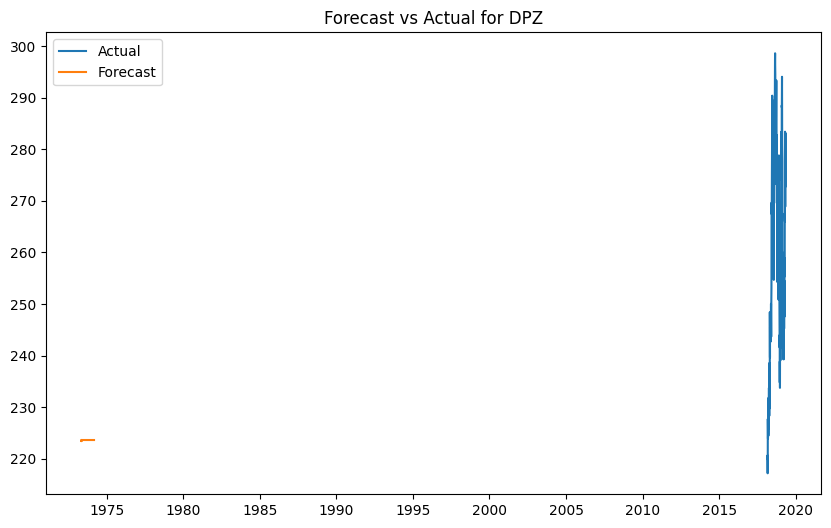

DPZ RMSE: 42.42025253965964


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


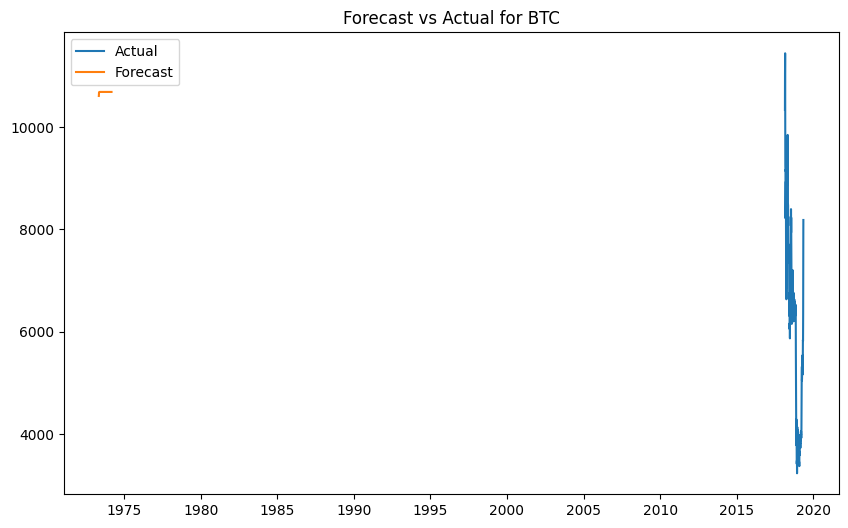

BTC RMSE: 4927.041730395272


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


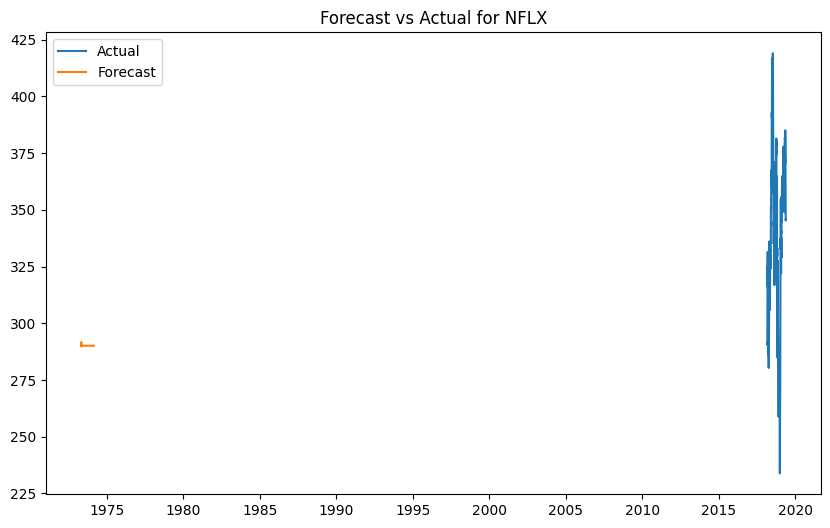

NFLX RMSE: 60.78316102691227


In [15]:
# 9. Forecasting
# Forecasting for each stock
forecasts = {}
for column in df.columns:
    start = len(train)
    end = len(train) + len(test) - 1
    forecasts[column] = models[column].predict(start=start, end=end, typ='levels')
    plt.figure(figsize=(10, 6))
    plt.plot(test[column], label='Actual')
    plt.plot(forecasts[column], label='Forecast')
    plt.title(f'Forecast vs Actual for {column}')
    plt.legend()
    plt.show()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test[column], forecasts[column]))
    print(f'{column} RMSE: {rmse}')
